In [2]:
import os
from nilearn import signal as sgl
from nilearn import image as img
from nilearn import plotting as plot
from nilearn import datasets
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bids
%matplotlib inline

ModuleNotFoundError: No module named 'bids'

In [ ]:
layout = bids.BIDSLayout('/Volumes/Seagate_Desktop_Drive/MFC_fMRIPREP/derivatives/fmriprep/',validate=False)
subjects = layout.get_subjects()

In [3]:
subjects

['mfcc003',
 'mfcc006',
 'mfcc007',
 'mfcc011',
 'mfcc014',
 'mfcc016',
 'mfcc024',
 'mfcc026',
 'mfcc027',
 'mfcc029',
 'mfcc035',
 'mfcc036',
 'mfcc037',
 'mfcc039',
 'mfcc041',
 'mfcc042',
 'mfcc045',
 'mfcc048',
 'mfcc053',
 'mfcc054',
 'mfcm001',
 'mfcm005',
 'mfcm009',
 'mfcm012',
 'mfcm019',
 'mfcm020',
 'mfcm021',
 'mfcm023',
 'mfcm031',
 'mfcm032',
 'mfcm033',
 'mfcm040',
 'mfcm043',
 'mfcm044',
 'mfcm046',
 'mfcm047',
 'mfcm051',
 'mfcm052',
 'mfcm055',
 'mfcm057']

In [4]:
#Load separated parcellation
# parcel_file = '/Volumes/Seagate_Desktop_Drive/MFC_fMRIPREP/resources/rois/yeo_2011/Yeo_JNeurophysiol11_MNI152/relabeled_yeo_atlas.nii.gz'
# yeo_7 = img.load_img(parcel_file)

atlas = datasets.fetch_atlas_basc_multiscale_2015(version='asym')["scale122"]

In [5]:
mask = layout.get(subject='mfcc003', datatype='anat',suffix='mask',extension='.nii.gz',space='MNI152NLin6Asym')
mask = mask[0].get_image()
mask

In [6]:
#pick subject from list
example_sub = subjects[0]

#get func file and confounds file

func_file = layout.get(subject=example_sub, datatype='func', task='n1', suffix='bold',extension='.nii.gz',space='MNI152NLin6Asym')




In [7]:
#load func file & drop first 4 TRs

func_mni = func_file[0].path
func_img = img.load_img(func_mni)
#func_img = func_img.slicer[:,:,:,5:]
func_img.shape

(91, 109, 91, 147)

In [8]:
from nilearn import image

#resize atlas to func size
resampled_atlas = image.resample_to_img(atlas,func_img,interpolation='nearest')
resampled_atlas.shape

(91, 109, 91)

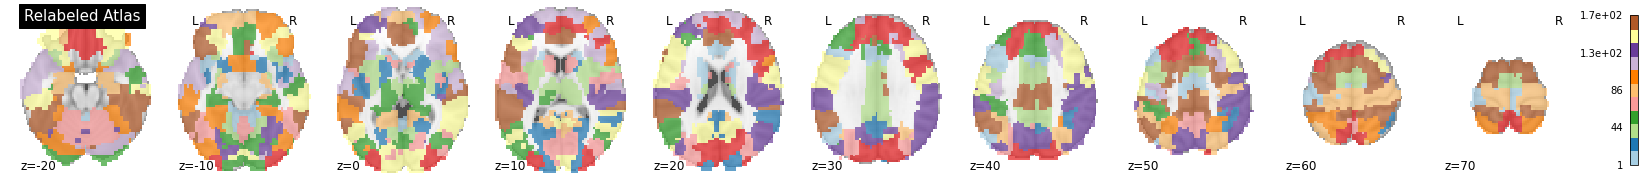

In [9]:
from nilearn.regions import connected_label_regions
from nilearn import plotting

region_labels = connected_label_regions(resampled_atlas)
plotting.plot_roi(region_labels,
                 cut_coords=(-20,-10,0,10,20,30,40,50,60,70),
                 display_mode = 'z',
                 colorbar = True,
                 cmap = 'Paired',
                 title = 'Relabeled Atlas')

In [10]:
# plotting.plot_roi(region_labels)

In [11]:
masker.fit_transform?

Object `masker.fit_transform` not found.


In [12]:
#Apply to first subject

In [13]:
# confound_file  # func_file

In [16]:
#load confounds, format, select, compute derivatives
confound_file = layout.get(subject=example_sub, datatype='func', extension='.tsv', task='n1', suffix='timeseries')
confound_file = confound_file[0]
confound_df = pd.read_csv(confound_file, delimiter = '\t')  #.fillna(0)
confounds = confound_df.filter(regex='[rot,trans]_[xyz]$|[rot,trans]_[xyz]_derivative1$|a_comp_cor_0[0-1]|global_signal$|csf$|white_matter$')

#select confound vars from df
# confound_vars = ['trans_x','trans_y','trans_z','rot_x','rot_y','rot_z','global_signal','a_comp_cor_00','a_comp_cor_01',
#                 trans_x]
# confound_df = confound_df[confound_vars]
# confound_df.head()

# #compute temporal derivatives
# for col in confound_df.columns:
#     #Example X --> X_dt
#     new_name = '{}_dt'.format(col) 
#     #Compute differences for each pair of rows from start to end
#     new_col = confound_df[col].diff()
#     #Make new col in df
#     confound_df[new_name] = new_col
# confound_df.fillna(0)
# confound_df.head()

In [ ]:
#drop TR on confound matrix
# confounds = confound_df.loc[5:]
# print(confounds.shape) #num of rows should match func img


In [17]:
confounds.head()

,global_signal,csf,white_matter,a_comp_cor_00,a_comp_cor_01,trans_x,trans_x_derivative1,trans_y,trans_y_derivative1,trans_z,trans_z_derivative1,rot_x,rot_x_derivative1,rot_y,rot_y_derivative1,rot_z,rot_z_derivative1
0,386.268412,550.376007,433.425929,-0.034492,-0.354604,-0.067680,NaN,-0.169438,NaN,-0.134994,NaN,0.001652,NaN,-0.002165,NaN,-0.001413,NaN
1,385.158055,544.823159,433.963340,0.067611,-0.021881,-0.051072,0.016607,-0.117220,0.052218,-0.081370,0.053624,0.000952,-0.000700,-0.001885,0.000280,-0.001083,0.000330
2,385.652658,544.093431,433.379436,0.095730,-0.123477,-0.051027,0.000046,-0.046660,0.070560,-0.073958,0.007412,0.000337,-0.000615,-0.001544,0.000340,-0.000818,0.000265
3,386.024833,544.458091,433.640556,-0.022571,-0.132665,-0.040603,0.010424,-0.134480,-0.087820,-0.062433,0.011526,0.000797,0.000460,-0.001130,0.000414,-0.000945,-0.000127
4,385.221218,543.266213,433.228017,-0.111986,-0.021465,-0.029434,0.011169,-0.060439,0.074041,-0.054685,0.007748,0.000470,-0.000327,-0.001130,0.000000,-0.000842,0.000102


In [18]:
confounds.to_csv("py_test_mfcc003_n1_confounds_reduced.csv")

In [20]:
from nilearn import input_data

# create input_data.NiftiLabelsMasker object, wrapper that applies parcellation, cleaning and averaging to functional img

masker = input_data.NiftiLabelsMasker(labels_img=region_labels,
                                     standardize=True,
                                     memory='nilearn_cache',
                                     verbose = 1,
                                     detrend=True,
                                     low_pass=0.08,
                                     high_pass=0.009,
                                     # mask_img=mask,
                                     t_r=2)

In [23]:
#apply cleaning, parcellation, and extraction to func data

time_series = masker.fit_transform(func_img, confounds='py_test_mfcc003_n1_confounds_reduced.csv)
time_series.shape

[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[   2.,    0.,    0.,  -90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)


AttributeError: '_io.BytesIO' object has no attribute 'mode'